<a href="https://colab.research.google.com/github/jlloring/ST-554_JLoring/blob/main/Loring_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST 554 Homework 4: Authored by Jamie Loring**

In [52]:
# importing required modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Summarizing Student Data Graphically**

### **Bring in Homework 3 Code**

The code and markdown cells below are copied from homework 3 that read in the data and summarized it numerically.

#### **Read in Data**

The code below reads in the provided dataset from the URL and names it `math_scores`.

*Note: Make sure the cell at the top containing the required modules has been run!*

In [53]:
math_scores = pd.read_csv("https://www4.stat.ncsu.edu/online/datasets/StudentData.txt", sep = ';')

#### **Categorical variables**

The code below creates a **one-way** contingency table on the `internet` variable.

In [54]:
math_scores.internet.value_counts()

,count
internet,
yes,329
no,66


Referencing the above output from the one-way contingency table, the value **329** tells us that of the 395 students represented in the dataset, 329 of them do have internet access at home.

The code below creates a **two-way** contingency table between the `activities` and `sex` variables.

In [55]:
pd.crosstab(math_scores.activities, math_scores.sex, margins = True)

sex,F,M,All
activities,,,
no,112,82,194
yes,96,105,201
All,208,187,395


Referencing the above output from the two-way contingency table, the value **105** tells us that of the 201 students that have extra-curricular activities, 105 of them are male.

The code below creates a **three-way** contingency table between the `guardian`, `reason`, and `higher` variables.

In [56]:
pd.crosstab([math_scores.reason, math_scores.guardian], math_scores.higher, margins = True)

higher               no  yes  All
reason     guardian              
course     father     2   29   31
           mother     7   99  106
           other      1    7    8
home       father     0   26   26
           mother     3   67   70
           other      0   13   13
other      father     1    7    8
           mother     3   23   26
           other      1    1    2
reputation father     1   24   25
           mother     1   70   71
           other      0    9    9
All                  20  375  395

Referencing the above output from the three-way contingency table, the value **99** tells us that there are 99 students from the dataset who want to take higher education, have their mother as their guardian, *and* chose the school/had their parents choose the school because of course preference.

The code below creates a **conditional two-way** table using the following method:

*Once, by subsetting the data (with `.loc`) and then creating the two-way table*

I chose to condition on the student's school being "Gabriel Pereira", and then looked at the `address` and `Pstatus` variables.

In [57]:
subset = math_scores.loc[math_scores['school'] == 'GP'] #creates subset of math_scores
pd.crosstab(subset.address, subset.Pstatus, margins = True)

Pstatus,A,T,All
address,,,
R,6,57,63
U,32,254,286
All,38,311,349


The code below creates a **conditional two-way** table using the following method:

*Once, by creating a three-way table and subsetting it*

First, we store the three-way table created earlier as an object called `three_way`. Then, we review the MultiIndex.

In [58]:
three_way = pd.crosstab([math_scores.reason, math_scores.guardian], math_scores.higher, margins = True)
three_way.index

MultiIndex([(    'course', 'father'),
            (    'course', 'mother'),
            (    'course',  'other'),
            (      'home', 'father'),
            (      'home', 'mother'),
            (      'home',  'other'),
            (     'other', 'father'),
            (     'other', 'mother'),
            (     'other',  'other'),
            ('reputation', 'father'),
            ('reputation', 'mother'),
            ('reputation',  'other'),
            (       'All',       '')],
           names=['reason', 'guardian'])

Using the MultiIndex, I chose to subset my three-way table on `reason` values of "reputation".

In [59]:
three_way.loc[("reputation", ("father", "mother", "other")), :]

higher               no  yes  All
reason     guardian              
reputation father     1   24   25
           mother     1   70   71
           other      0    9    9

#### **Numeric variables (and across groups)**

The code below finds measures of center and spread for the `G1`, `G2`, and `G3` variables. *Note that the 50th percentile is the median!*

In [60]:
math_scores[["G1", "G2", "G3"]].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


The code below repeats finding measures of center and spread for the `G1`, `G2`, and `G3` variables while subsetting the data for females only based on the `sex` variable. *Note that the 50th percentile is the median!*

In [61]:
math_scores.loc[math_scores['sex'] == 'F'][["G1", "G2", "G3"]].describe()

,G1,G2,G3
count,208.000000,208.000000,208.000000
mean,10.620192,10.389423,9.966346
std,3.232530,3.641851,4.622338
min,4.000000,0.000000,0.000000
25%,8.000000,8.000000,8.000000
50%,10.000000,10.000000,10.000000
75%,13.000000,13.000000,13.000000
max,19.000000,18.000000,19.000000


The code below finds measures of center and spread across a single grouping variable, `Pstatus`, for the `G1`, `G2`, and `G3` variables.

In [62]:
print('Means')
print(math_scores.groupby("Pstatus")[["G1", "G2", "G3"]].mean())
print('')
print('Medians')
print(math_scores.groupby("Pstatus")[["G1", "G2", "G3"]].median())
print('')
print('Standard Deviations')
print(math_scores.groupby("Pstatus")[["G1", "G2", "G3"]].std())

Means
                G1         G2         G3
Pstatus                                 
A        11.073171  11.170732  11.195122
T        10.889831  10.661017  10.324859

Medians
           G1    G2    G3
Pstatus                  
A        11.0  11.0  11.0
T        11.0  11.0  11.0

Standard Deviations
               G1        G2        G3
Pstatus                              
A        3.386667  3.974308  4.290801
T        3.315644  3.738371  4.611121


I include the code below that uses the `.describe()` method instead of the "brute force" coding I did above, but it truncates some of the metrics for `G2` due to there being so many columns in the output.

In [63]:
math_scores.groupby("Pstatus")[["G1", "G2", "G3"]].describe()

G1                                                      G2  \
         count       mean       std  min  25%   50%   75%   max  count   
Pstatus                                                                  
A         41.0  11.073171  3.386667  4.0  8.0  11.0  13.0  18.0   41.0   
T        354.0  10.889831  3.315644  3.0  8.0  11.0  13.0  19.0  354.0   

                    ...                 G3                                 \
              mean  ...   75%   max  count       mean       std  min  25%   
Pstatus             ...                                                     
A        11.170732  ...  13.0  19.0   41.0  11.195122  4.290801  0.0  9.0   
T        10.661017  ...  13.0  19.0  354.0  10.324859  4.611121  0.0  8.0   

                           
          50%   75%   max  
Pstatus                    
A        11.0  13.0  19.0  
T        11.0  14.0  20.0  

[2 rows x 24 columns]

The code below finds measures of center and spread across two grouping variables, `Mjob` and `Fjob`, for the `G1` variable first.

In [64]:
pd.crosstab(
  math_scores.Mjob,
  math_scores.Fjob,
  values = math_scores.G1,
  aggfunc = ['mean', 'median', 'std'])

mean                                              median  \
Fjob        at_home     health      other   services    teacher at_home   
Mjob                                                                      
at_home   13.857143  12.500000   9.727273  10.666667   7.000000    15.0   
health          NaN  12.833333  12.000000  12.400000  10.000000     NaN   
other      9.400000  11.500000  10.144231  10.083333  11.333333     9.0   
services  11.166667   9.750000  11.476190  10.860465  14.750000    11.5   
teacher   11.500000  10.500000  11.000000  11.000000  13.666667    11.5   

                                             std                      \
Fjob     health other services teacher   at_home    health     other   
Mjob                                                                   
at_home    12.5  10.0     10.0     7.0  3.532165  3.535534  2.786942   
health     13.0  13.0     14.0    10.0       NaN  2.786874  2.622022   
other      11.5  10.0     10.0    11.0  2.302173  2.121320  3.212289   
services   10.5  11.5     11.0    16.0  3.311596  2.629956  3.603779   
teacher    10.0  11.0     10.0    15.0  7.778175  2.516611  2.810694   

                              
Fjob      services   teacher  
Mjob                          
at_home   3.373567  2.828427  
health    4.115013       NaN  
other     3.161132  3.141125  
services  3.082836  3.918819  
teacher   2.848001  3.576014

Now the `G2` variable.

In [65]:
pd.crosstab(
  math_scores.Mjob,
  math_scores.Fjob,
  values = math_scores.G2,
  aggfunc = ['mean', 'median', 'std'])

mean                                              median  \
Fjob        at_home     health      other   services    teacher at_home   
Mjob                                                                      
at_home   13.428571  11.500000   9.090909   9.866667   3.000000    14.0   
health          NaN  13.333333  11.764706  12.900000  11.000000     NaN   
other      9.800000  12.000000  10.048077  10.375000  11.333333    10.0   
services   8.000000  10.000000  11.714286  10.976744  12.875000    11.5   
teacher   10.500000   9.500000  10.571429  11.052632  13.333333    10.5   

                                             std                      \
Fjob     health other services teacher   at_home    health     other   
Mjob                                                                   
at_home    11.5   9.0     10.0     3.0  3.359422  2.121320  3.503245   
health     14.5  12.0     14.0    11.0       NaN  3.265986  2.462961   
other      12.0  10.0     11.0    11.5  0.836660  1.414214  3.855093   
services   10.5  12.0     11.0    15.5  6.228965  3.162278  3.958848   
teacher     8.5  11.0     10.0    14.0  7.778175  3.872983  3.695557   

                              
Fjob      services   teacher  
Mjob                          
at_home   2.850230  4.242641  
health    3.754997       NaN  
other     2.840889  3.614784  
services  3.305755  6.379375  
teacher   2.460210  3.821788

Finally, the `G3` variable.

In [66]:
pd.crosstab(
  math_scores.Mjob,
  math_scores.Fjob,
  values = math_scores.G3,
  aggfunc = ['mean', 'median', 'std'])

mean                                          median         \
Fjob        at_home health      other   services    teacher at_home health   
Mjob                                                                         
at_home   12.285714  11.50   8.878788   8.800000   3.000000    14.0   11.5   
health          NaN  13.50  11.588235  12.400000  11.000000     NaN   14.5   
other      9.200000  12.00   9.798077   9.500000  11.333333     9.0   12.0   
services   8.166667  10.25  11.357143  10.767442  13.125000    11.5    9.5   
teacher   11.000000  10.00  10.761905  10.315789  13.083333    11.0    9.0   

                                      std                                \
Fjob     other services teacher   at_home    health     other  services   
Mjob                                                                      
at_home   10.0      9.0     3.0  6.047432  2.121320  4.414165  4.427189   
health    13.0     14.5    11.0       NaN  3.781534  3.725903  5.561774   
other     10.5     11.0    11.5  1.095445  1.414214  4.556825  4.353909   
services  11.0     11.0    16.5  6.369197  2.872281  4.827873  4.185219   
teacher   11.0     10.0    14.5  7.071068  3.464102  3.780275  4.583214   

                    
Fjob       teacher  
Mjob                
at_home   4.242641  
health         NaN  
other     3.204164  
services  6.512351  
teacher   5.107184

The code below creates a correlation matrix between all of the numeric variables.

In [67]:
math_scores[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


### **Task 1**

#### **Categorical variables**

The code below creates a **stacked bar graph** from the two-way contingency table created in the *Categorical variables* section.

First we save the two-way table as an object called `two_way`.

In [68]:
two_way = pd.crosstab(math_scores.activities, math_scores.sex) #removed margins=True argument

Now we create the **stacked bar graph**.

Text(0.5, 1.0, 'Breakdown of Sex by Activity Participation')

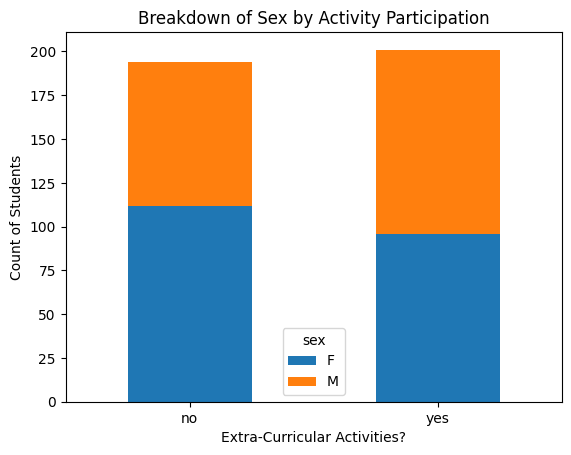

In [69]:
two_way.plot.bar(stacked = True, rot = 0)
plt.xlabel('Extra-Curricular Activities?')
plt.ylabel('Count of Students')
plt.title('Breakdown of Sex by Activity Participation')

The above graph easily shows us that slightly more students do participate in extra-curricular activities over those that do not! Also, I find it interesting that more females *do not* participate in extra-curriculars than males, while the oppostie holds true for those who do participate (i.e., more males than females *do* participate in extra-curriculars).

The code below reproduces the same bar graph above as a **side-by-side bar graph** instead of stacked.

Text(0.5, 1.0, 'Breakdown of Sex by Activity Participation')

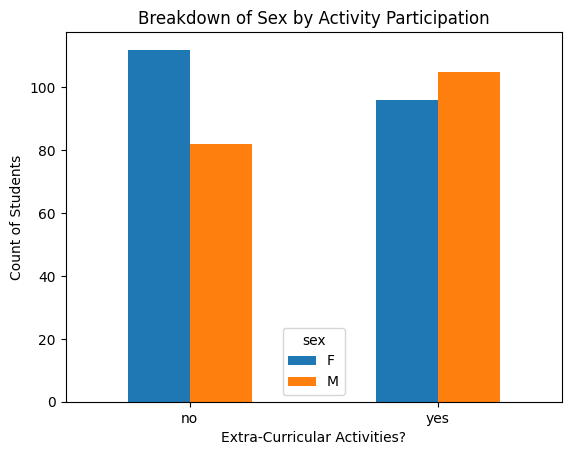

In [70]:
two_way.plot.bar(rot = 0)
plt.xlabel('Extra-Curricular Activities?')
plt.ylabel('Count of Students')
plt.title('Breakdown of Sex by Activity Participation')

The side-by-side bar graph above makes it easier to see the split by sex between those who participate in extra-curicular activities and those who do not, compared to the stacked bar graph. While I mentioned it looking at the stacked bar graph, it is much more noticable here that more males than females participate in extra-curricular activities, and more females than males do not participate in extra-curriculars.

#### **Numeric variables (and across groups)**

##### **Histograms**

The code below creates a histogram of the `G2` variable, grouped by the`activities` variable.

First, we set up the bin widths manually.

In [71]:
bin_ends_G2 = 10
bins_G2 = [j*max(math_scores.G2)/bin_ends_G2 for j in range(0, bin_ends_G2 + 1)]

Next, we set up the subsets of data that we need.

In [72]:
G2_yes_activity = math_scores.loc[math_scores.activities == "yes", "G2"] #series for yes activity
G2_no_activity = math_scores.loc[math_scores.activities == "no", "G2"] #series for no activity

Finally, we compile the histogram.

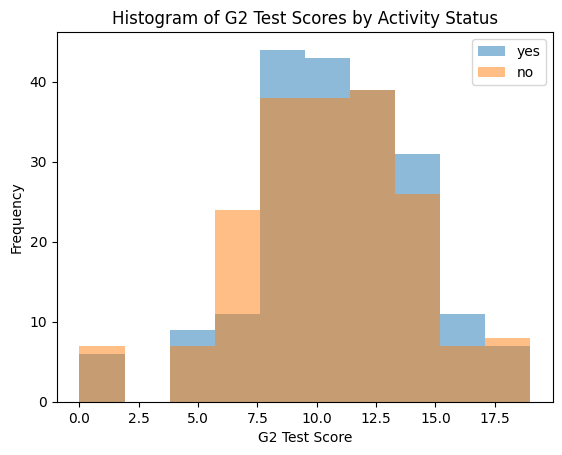

In [73]:
G2_yes_activity.plot.hist(bins = bins_G2, alpha = 0.5, label = "yes",
                          title = "Histogram of G2 Test Scores by Activity Status")
G2_no_activity.plot.hist(bins = bins_G2, alpha = 0.5, label = "no")
plt.xlabel("G2 Test Score")
plt.legend()

I find it interesting that more students who scored near the median G2 test score participate in extra-curricular activities over those who don't. I think this supports the notion of a "well-rounded" education, meaning students should devote time to both their studies and extra-curricular activities as well!

Now, I create a second histogram of the `age` variable, grouped by the `sex` variable. I will do all the preliminary prep work and create the graph in one code cell rather than in separate code cells like I did previously.

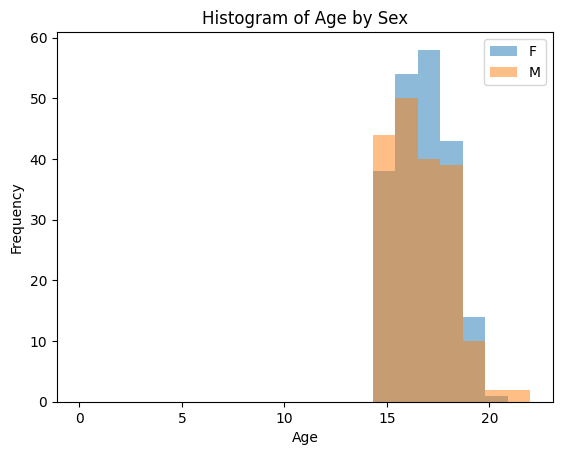

In [74]:
bin_ends_age = 20
bins_age = [k*max(math_scores.age)/bin_ends_age for k in range(0, bin_ends_age + 1)]

age_female = math_scores.loc[math_scores.sex == "F", "age"] #series for females
age_male = math_scores.loc[math_scores.sex == "M", "age"] #series males

age_female.plot.hist(bins = bins_age, alpha = 0.5, label = "F",
                     title = "Histogram of Age by Sex")
age_male.plot.hist(bins = bins_age, alpha = 0.5, label = "M")
plt.xlabel("Age")
plt.legend()

Looking at the above histogram, it makes sense that the majority of the ages are over 15 and under 20. Typical ages for high school students are between 14 (freshmen) and 18 (seniors)!

##### **Kernel Density Plots**

The code below creates a kernel density plot of the `absences` variable across the different levels of the `guardian` variable.

First, we create the subsets of data that we need.

In [75]:
absence_M_guard = math_scores.loc[math_scores.guardian == "mother", "absences"] #series for mother guardian
absence_F_guard = math_scores.loc[math_scores.guardian == "father", "absences"] #series for father guardian
absence_O_guard = math_scores.loc[math_scores.guardian == "other", "absences"] #series for other guardian

Now we compile the kernel density plot.

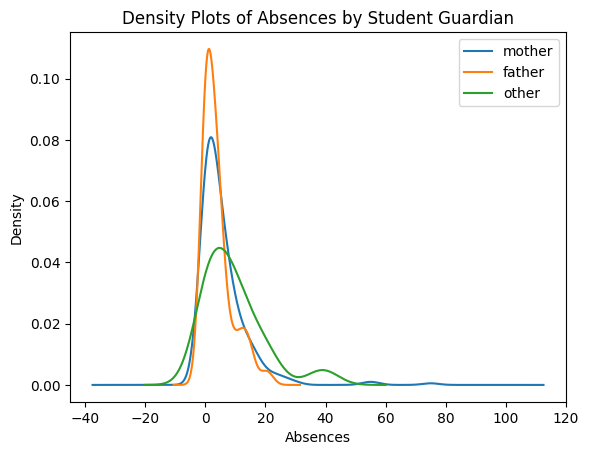

In [76]:
absence_M_guard.plot.density(label = "mother", title = "Density Plots of Absences by Student Guardian")
absence_F_guard.plot.density(label = "father")
absence_O_guard.plot.density(label = "other")
plt.xlabel("Absences")
plt.legend()

Looking at the above plot, it makes sense to me that the "other" line has the smallest density, since the majority of students have mothers or fathers as their primary guardian.

Now, I create a kernel density plot of the `G1` variable across the different levels of the `schoolsup` variable. I will do all the preliminary prep work and create the graph in one code cell rather than in separate code cells like I did previously.

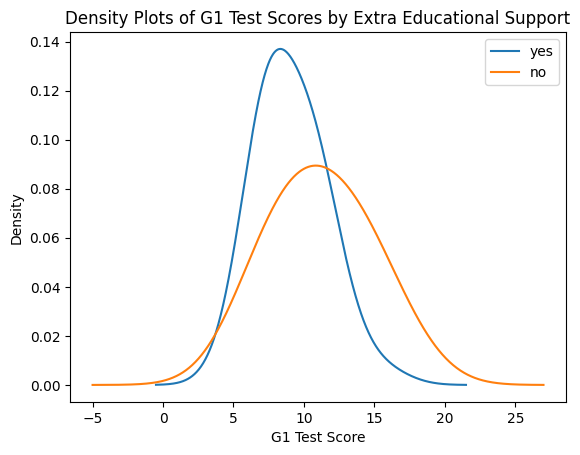

In [77]:
G1_Y_schoolsup = math_scores.loc[math_scores.schoolsup == "yes", "G1"] #series for extra educational support
G1_N_schoolsup = math_scores.loc[math_scores.schoolsup == "no", "G1"] #series for no extra educational support

G1_Y_schoolsup.plot.density(bw_method = 0.75, label = "yes", title = "Density Plots of G1 Test Scores by Extra Educational Support")
G1_N_schoolsup.plot.density(bw_method = 0.75, label = "no")
plt.xlabel("G1 Test Score")
plt.legend()

I think it's fair to assume that those students who do receive extra educational support do so because they tend to score lower on tests. The above graph reflects this assumption, as the density for students who do receive extra help is highest around a G1 test score of 8, whereas the density for students who don't receive extra help is highest around a G1 test score of 12.

##### **Boxplots**

The code below creates boxplots of the `absences` variable across the different levels of the `address` variable.

Text(0, 0.5, 'Absences')

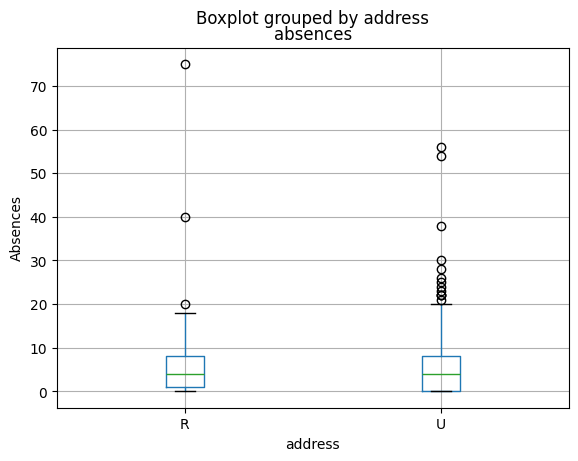

In [78]:
math_scores.boxplot(column = ["absences"], by = "address")
plt.ylabel("Absences")

I find it interesting that the above graph shows more outliers for students with urban addresses over rural ones!

The code below creates boxplots of the `G3` variable across the different levels of the `Pstatus` variable.

Text(0, 0.5, 'G3 Test Score')

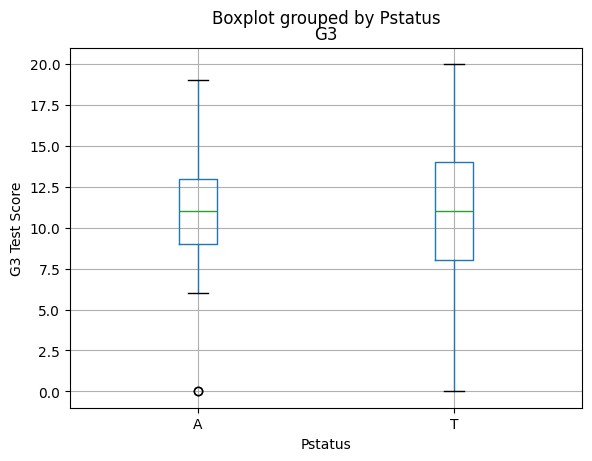

In [79]:
math_scores.boxplot(column = ["G3"], by = "Pstatus")
plt.ylabel("G3 Test Score")

I immediately notced that the spread of G3 test scores of students whose parents are apart is much smaller than the spread of G3 test scores of students whos parents live togeher, especially if we don't take into account the outlier.

##### **Scatterplots**

The code below creates a scatterplot of `G3` vs. `G1` test scores, colored by the `sex` variable.

Text(0, 0.5, 'G3 Test Scores')

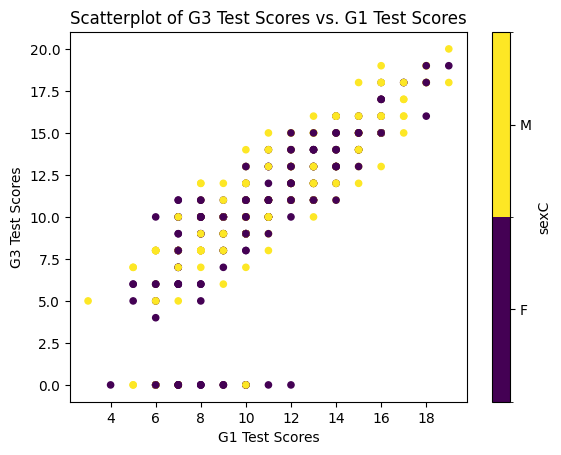

In [80]:
math_scores["sexC"] = math_scores.sex.astype("category") #explicitly recodes the sex variable as a category
math_scores.plot.scatter(x = "G1", y = "G3", c = "sexC", cmap = "viridis", s = 20,
                         title = "Scatterplot of G3 Test Scores vs. G1 Test Scores")
plt.xlabel("G1 Test Scores")
plt.ylabel("G3 Test Scores")

We can see that 9 students who took the G1 test did not take the G3 test. Aside from those observations, I would say there is a moderately-strong positive correlation between G1 and G3 test scores. I will assess this claim by finding the correlation below (between all points).

In [81]:
math_scores[["G1", "G3"]].corr()

,G1,G3
G1,1.000000,0.801468
G3,0.801468,1.000000


A correlation of 0.8015 does indeed indicate a moderately-strong positive correlation!

The code below creates a scatterplot of `G3` vs. `G2` test scores, colored by the `famsup` variable.

Text(0, 0.5, 'G3 Test Scores')

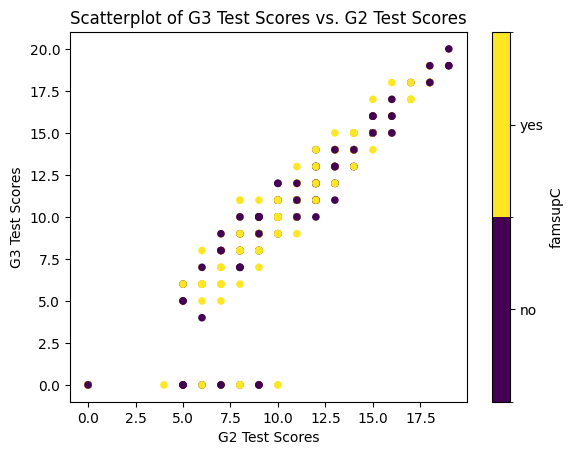

In [82]:
math_scores["famsupC"] = math_scores.famsup.astype("category") #explicitly recodes the famsup variable as a category
math_scores.plot.scatter(x = "G2", y = "G3", c = "famsupC", cmap = "viridis", s = 20,
                         title = "Scatterplot of G3 Test Scores vs. G2 Test Scores")
plt.xlabel("G2 Test Scores")
plt.ylabel("G3 Test Scores")

We can see that 8 students who took the G2 test did not take the G3 test. Aside from those observations, I would say there is a strong positive correlation between G2 and G3 test scores. I will assess this claim by finding the correlation below (between all points).

In [83]:
math_scores[["G2", "G3"]].corr()

,G2,G3
G2,1.000000,0.904868
G3,0.904868,1.000000


A correlation of 0.9049 does indeed indicate a moderately-strong positive correlation!

## **Plotting the NFL data**

### **Task 1: Read in the data**

The code below reads in the data via the URL and checks out the first few observations of the data.

In [84]:
NFL_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
NFL_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


The code below converts the following variables to `category` type variables:

- `homeTeam`
- `awayTeam`
- `day`
- `stadium`
- `startTime`
- `toss`
- `roof`
- `surface`

In [85]:
NFL_data["homeTeamC"] = NFL_data.homeTeam.astype("category")
NFL_data["awayTeamC"] = NFL_data.awayTeam.astype("category")
NFL_data["dayC"] = NFL_data.day.astype("category")
NFL_data["stadiumC"] = NFL_data.stadium.astype("category")
NFL_data["startTimeC"] = NFL_data.startTime.astype("category")
NFL_data["tossC"] = NFL_data.toss.astype("category")
NFL_data["roofC"] = NFL_data.roof.astype("category")
NFL_data["surfaceC"] = NFL_data.surface.astype("category")

### **Task 2: Summarize the data**

First we will subset the data to be from the regular season (i.e., weeks 1-17). I will need to see what all the different values are for the `week` variable.

In [86]:
NFL_data['week'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', 'WildCard', 'Division', 'ConfChamp',
       'SuperBowl'], dtype=object)

This tells me that the `week` variable consists of string values, so I will manually filter out the non-week-number values. I will also convert `week` to a numeric variable by creating `weekN`. The warning can be ignored as it does not impact the code to follow.

In [87]:
reg_season = NFL_data.loc[(NFL_data['week'] != 'WildCard') &
                          (NFL_data['week'] != 'Division') &
                          (NFL_data['week'] != 'ConfChamp') &
                          (NFL_data['week'] != "SuperBowl")]
reg_season["weekN"] = reg_season["week"].astype(int)
reg_season.head()

/tmp/ipython-input-3596739101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_season["weekN"] = reg_season["week"].astype(int)


,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeSpread,homeTeamC,awayTeamC,dayC,stadiumC,startTimeC,tossC,roofC,surfaceC,weekN
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,-4.0,New York Giants,San Francisco 49ers,Thu,Giants Stadium,8:38pm,Giants,outdoors,grass,1
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,4.5,Chicago Bears,Minnesota Vikings,Sun,Memorial Stadium (Champaign),1:04pm,Vikings,outdoors,astroplay,1
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,6.0,Tampa Bay Buccaneers,New Orleans Saints,Sun,Raymond James Stadium,4:15pm,Buccaneers,outdoors,grass,1
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,-3.0,Buffalo Bills,New York Jets,Sun,Ralph Wilson Stadium,1:04pm,Bills,outdoors,astroturf,1
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,6.0,Washington Redskins,Arizona Cardinals,Sun,FedExField,1:05pm,Redskins,outdoors,grass,1


#### **Numeric Summaries**

The code below produces some common numeric summaries of the `AFinal` and `HFinal` variables, grouped by `season`.

In [88]:
reg_season.groupby("season")[["AFinal", "HFinal"]].describe()

AFinal                                                     HFinal  \
        count       mean        std  min   25%   50%    75%   max  count   
season                                                                     
2002    256.0  20.550781  10.064759  0.0  13.0  20.5  27.00  49.0  256.0   
2003    256.0  19.054688  10.251970  0.0  13.0  19.0  24.25  55.0  256.0   
2004    256.0  20.230469  10.175596  0.0  13.0  19.0  27.00  49.0  256.0   
2005    256.0  18.792969   9.948894  0.0  10.0  19.0  24.00  45.0  256.0   
2006    256.0  20.234375  10.386254  0.0  13.0  21.0  27.00  49.0  256.0   
2007    256.0  20.253906  10.703215  0.0  13.0  20.0  28.00  56.0  256.0   
2008    256.0  20.750000  10.420944  0.0  13.0  20.0  27.00  54.0  256.0   
2009    256.0  20.363281  10.672526  0.0  13.0  20.0  27.00  48.0  256.0   
2010    256.0  21.089844  10.288187  0.0  14.0  20.0  27.25  59.0  256.0   
2011    256.0  20.546875   9.634789  0.0  14.0  20.0  27.00  45.0  256.0   
2012    256.0  21.539062  10.404676  0.0  13.0  21.5  27.25  52.0  256.0   
2013    256.0  21.855469   9.664500  0.0  16.0  21.0  27.00  56.0  256.0   
2014    256.0  21.343750   9.877634  0.0  14.0  21.0  27.00  48.0  256.0   

                                                             
             mean        std  min    25%   50%    75%   max  
season                                                       
2002    22.796875  10.182152  0.0  16.00  23.0  30.00  52.0  
2003    22.609375  10.119470  0.0  16.00  23.0  28.00  50.0  
2004    22.738281  10.400502  0.0  15.75  23.0  30.00  58.0  
2005    22.441406   9.797383  0.0  16.00  21.0  28.00  52.0  
2006    21.082031   9.856475  0.0  14.00  20.0  27.00  48.0  
2007    23.121094  10.568033  3.0  16.00  22.0  31.00  56.0  
2008    23.308594  10.454499  0.0  16.00  24.0  31.00  56.0  
2009    22.570312  10.666557  0.0  16.00  23.0  30.00  59.0  
2010    22.984375  10.251339  0.0  14.00  23.0  31.00  49.0  
2011    23.812500  10.524109  0.0  17.00  23.0  30.25  62.0  
2012    23.972656  10.559413  0.0  17.00  23.0  31.00  59.0  
2013    24.960938  10.533534  0.0  19.00  24.0  31.00  55.0  
2014    23.832031  10.954053  0.0  17.00  23.0  30.25  56.0

Now we produce the same summaries as above, but grouped by `week` instead.

In [89]:
reg_season.groupby("weekN")[["AFinal", "HFinal"]].describe()

AFinal                                                      HFinal  \
       count       mean        std  min    25%   50%    75%   max  count   
weekN                                                                      
1      208.0  19.716346   8.977768  0.0  13.00  20.0  26.00  41.0  208.0   
2      207.0  19.545894  10.433170  0.0  10.00  20.0  27.00  48.0  207.0   
3      198.0  20.767677   9.634781  0.0  13.00  23.0  27.00  44.0  198.0   
4      184.0  20.983696  10.062361  0.0  14.00  20.0  27.25  55.0  184.0   
5      182.0  20.527473  10.300824  0.0  13.00  20.5  27.00  51.0  182.0   
6      181.0  20.679558  10.270079  0.0  14.00  20.0  27.00  48.0  181.0   
7      180.0  21.111111  10.674927  0.0  14.00  20.0  27.00  59.0  180.0   
8      178.0  20.151685   9.782639  0.0  13.00  20.0  27.00  45.0  178.0   
9      178.0  22.146067   9.701244  0.0  16.00  23.0  28.00  51.0  178.0   
10     186.0  21.543011  10.015705  0.0  15.25  21.0  27.00  59.0  186.0   
11     201.0  19.592040  10.017122  0.0  13.00  19.0  27.00  56.0  201.0   
12     205.0  21.507317  10.795160  0.0  13.00  21.0  28.00  54.0  205.0   
13     208.0  20.437500  10.131786  0.0  13.00  20.0  27.00  47.0  208.0   
14     208.0  19.394231  10.203171  0.0  10.00  20.0  27.00  49.0  208.0   
15     208.0  20.942308  11.224393  0.0  13.00  20.0  28.00  56.0  208.0   
16     208.0  20.802885  10.330041  0.0  13.00  20.0  28.00  44.0  208.0   
17     208.0  19.235577  10.637064  0.0  10.00  19.0  26.00  44.0  208.0   

                                                            
            mean        std  min    25%   50%    75%   max  
weekN                                                       
1      22.139423  10.595541  0.0  14.00  20.5  30.00  49.0  
2      22.840580   9.842384  0.0  15.50  23.0  30.00  51.0  
3      22.646465  10.153955  0.0  16.00  23.0  30.00  56.0  
4      24.092391  10.874704  0.0  16.00  23.0  31.25  56.0  
5      24.324176  10.158379  3.0  17.00  24.0  31.00  52.0  
6      22.988950   9.254422  3.0  17.00  23.0  28.00  59.0  
7      23.338889  10.948924  0.0  16.00  23.0  30.00  62.0  
8      23.359551  10.573121  0.0  16.00  23.0  30.00  52.0  
9      22.258427   9.152849  0.0  17.00  21.5  27.00  55.0  
10     22.983871  10.753491  0.0  14.00  23.0  30.00  55.0  
11     22.582090  10.326397  0.0  15.00  22.0  30.00  59.0  
12     22.878049  10.035220  0.0  17.00  21.0  28.00  58.0  
13     23.201923  10.579700  0.0  16.00  23.0  31.00  52.0  
14     24.605769  11.453682  0.0  16.00  24.0  31.00  58.0  
15     22.543269  10.288498  0.0  15.00  21.0  30.00  51.0  
16     22.168269  11.019331  0.0  14.75  21.0  28.00  55.0  
17     23.807692  10.339247  0.0  17.00  23.0  31.00  52.0

Finally, we produce the same summaries as above, but grouped by `season` *AND* `week`.

In [90]:
reg_season.groupby(["season", "weekN"])[["AFinal", "HFinal"]].describe()

AFinal                                                        \
              count       mean        std   min    25%   50%    75%   max   
season weekN                                                                
2002   1       16.0  23.125000   9.680737   7.0  16.00  23.0  29.50  40.0   
       2       16.0  22.687500  12.354318   3.0  13.75  23.5  27.00  45.0   
       3       14.0  19.571429  11.765100   3.0  10.75  22.0  27.50  38.0   
       4       14.0  18.928571   8.939663   3.0  13.25  19.0  24.50  35.0   
       5       14.0  24.000000  10.355229   9.0  17.00  23.0  29.00  49.0   
...             ...        ...        ...   ...    ...   ...    ...   ...   
2014   13      16.0  20.687500   9.470788   0.0  15.50  20.0  27.50  35.0   
       14      16.0  27.062500   9.698582  13.0  21.50  24.5  36.25  42.0   
       15      16.0  18.000000   8.899438   7.0  12.75  13.5  23.25  38.0   
       16      16.0  22.875000  10.052363   7.0  13.00  22.0  31.25  38.0   
       17      16.0  20.812500  11.438058   6.0  13.00  17.0  28.75  44.0   

             HFinal                                                       
              count       mean        std  min    25%   50%    75%   max  
season weekN                                                              
2002   1       16.0  26.125000  11.050641  6.0  19.75  27.0  31.00  49.0  
       2       16.0  18.187500  10.387292  0.0  13.00  16.5  21.75  39.0  
       3       14.0  24.428571  11.460395  3.0  16.25  27.0  30.00  44.0  
       4       14.0  28.285714  14.187907  7.0  18.00  27.0  34.75  52.0  
       5       14.0  23.214286   8.441460  6.0  18.00  25.5  28.00  37.0  
...             ...        ...        ...  ...    ...   ...    ...   ...  
2014   13      16.0  27.312500  14.012940  3.0  15.25  27.5  33.25  52.0  
       14      16.0  19.750000  10.908712  0.0  13.00  19.0  25.00  43.0  
       15      16.0  18.437500   9.750000  0.0  14.00  18.0  21.75  41.0  
       16      16.0  22.937500  11.227756  3.0  15.50  23.0  29.00  42.0  
       17      16.0  20.500000  10.013324  3.0  16.00  20.0  24.50  47.0  

[221 rows x 16 columns]

#### **Graphical Summaries**

The code below produces a line plot of average points per season for both the home and away teams.

Text(0, 0.5, 'Average Score')

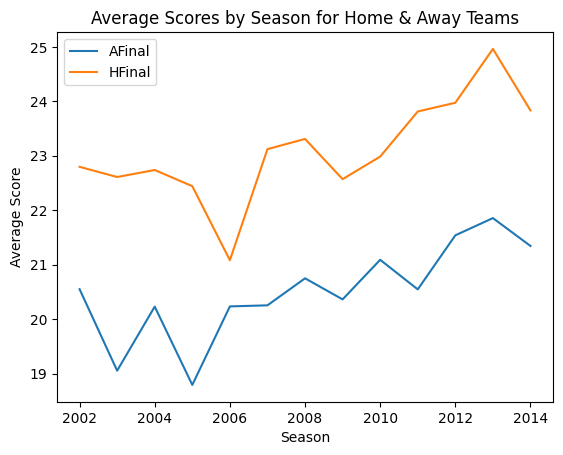

In [91]:
avg_AFinal_s = reg_season.groupby("season")["AFinal"].mean() #stores average AFinal scores by season
avg_HFinal_s = reg_season.groupby("season")["HFinal"].mean() #stores average HFinal scores by season

plt.plot(avg_AFinal_s.index, avg_AFinal_s, label = "AFinal") #.index represents the season
plt.plot(avg_HFinal_s.index, avg_HFinal_s, label = "HFinal") #.index represents the season
plt.legend()
plt.title("Average Scores by Season for Home & Away Teams")
plt.xlabel("Season")
plt.ylabel("Average Score")

I was surprised to see that the home team has a higher average score for each season in the dataset during the regular season. This goes to show just how important the home-field advantage is!

Now we create a similar plot as before, but grouped by `week` instead.

Text(0, 0.5, 'Average Score')

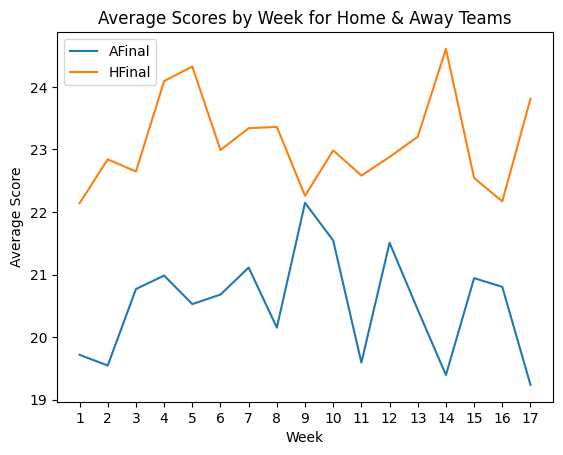

In [92]:
avg_AFinal_w = reg_season.groupby("weekN")["AFinal"].mean() #stores average AFinal scores by week
avg_HFinal_w = reg_season.groupby("weekN")["HFinal"].mean() #stores average HFinal scores by week

plt.plot(avg_AFinal_w.index, avg_AFinal_w, label = "AFinal") #.index represents the week
plt.plot(avg_HFinal_w.index, avg_HFinal_w, label = "HFinal") #.index represents the week
plt.legend()
plt.title("Average Scores by Week for Home & Away Teams")
plt.xlabel("Week")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
            11 ,12, 13, 14, 15, 16, 17])
plt.ylabel("Average Score")

I am not surprised to see that the home team scores higher, on average, over all weeks compared to the away team (because of home-field advantage). I wonder what happened during week 9 to make the average scores so close!

#### **Function**

First, we code the `timeit` function from the notes.

In [93]:
import time
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper

Now, we create a function that outputs a plot based on the arguments. Please read the function doc string for additional *important* information!

In [94]:
@timeit

# assumes numpy, pandas, and matplotlib are already imported in -- if not, import them!
def plot_func(num_var: str, cat_var: str, stat_method: str):

    """
    This function creates a plot from the subsetted NFL_data based on the regular season (reg_season).

    num_var = a numeric variable from the reg_season dataset
    cat_var = a categorical/grouping variable from the reg_season dataset -- make sure to
              choose the version that was specifically converted to a category if that is
              what you want to select
    stat_method = the statistic of your num_var that you want to plot across your cat_var,
                  MUST BE ONE OF THE FOLLOWING:
                  - mean
                  - median
                  - std
                  - var
                  - min
                  - max

    Returns a line plot or bar graph of the stat_method of the num_var, plotted across the cat_var.
    The graph returned depends on the cat_var supplied.
    """

    if num_var not in ['AQ1', 'AQ2', 'AQ3', 'AQ4', 'AOT', 'AOT2', 'AFinal',
                       'HQ1', 'HQ2', 'HQ3', 'HQ4', 'HOT', 'HOT2', 'HFinal',
                       'AfirstDowns', 'AnetPassYds', 'AtotalYds', 'Aturnovers', 'AtotalPlays',
                       'HfirstDowns', 'HnetPassYds', 'HtotalYds', 'Hturnovers', 'HtotalPlays',
                       'awayRushAtt', 'awayRushYds', 'awayRushTD', 'awayPassComp', 'awayPassAtt',
                       'awayPassYds', 'awayPassTD', 'awayPassInt', 'awayTimesSacked',
                       'awaySackYdsLost', 'awayFum', 'awayFumLost', 'awayNumPen', 'awayPenYds',
                       'away3rdConv', 'away3rdAtt', 'away4thConv', 'away4thAtt', 'awayTOP',
                       'homeRushAtt', 'homeRushYds', 'homeRushTD', 'homePassComp', 'homePassAtt',
                       'homePassYds', 'homePassTD', 'homePassInt', 'homeTimesSacked',
                       'homeSackYdsLost', 'homeFum', 'homeFumLost', 'homeNumPen', 'homePenYds',
                       'home3rdConv', 'home3rdAtt', 'home4thConv', 'home4thAtt', 'homeTOP',
                       'HminusAScore', 'homeSpread']:
        raise Exception("Invalid num_var supplied. Please try again.")

    if cat_var not in ['date', 'season', 'homeTeamC', 'awayTeamC', 'dayC', 'stadiumC', 'startTimeC',
                       'tossC', 'roofC', 'surfaceC', 'weekN']:
        raise Exception("Invalid cat_var supplied. Please try again.")

    if stat_method not in ['mean', 'median', 'std', 'var', 'min', 'max']:
        raise Exception("Invalid stat_method supplied. Please try again.")

    stat_num_cat = reg_season.groupby(cat_var)[num_var].agg(stat_method) #creates data with arguments supplied

    if cat_var in ['season', 'startTimeC', 'weekN']:
        plt.plot(stat_num_cat.index, stat_num_cat) #.index represents the cat_var
        plt.title(stat_method + ' of ' + num_var + ' by ' + cat_var)
        plt.xlabel(cat_var)
        plt.ylabel(stat_method + ' of ' + num_var)
    else:
        stat_num_cat.plot.bar()
        plt.title(stat_method + ' of ' + num_var + ' by ' + cat_var)
        plt.xlabel(cat_var)
        plt.ylabel(stat_method + ' of ' + num_var)


##### **Example 1**

The code below runs the `plot_func` function with the following inputs:
- num_var = `homeFum`
- cat_var = `homeTeamC`
- stat_method = `mean`

/tmp/ipython-input-1500467846.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_num_cat = reg_season.groupby(cat_var)[num_var].agg(stat_method) #creates data with arguments supplied


plot_func ran in 0.092803 seconds


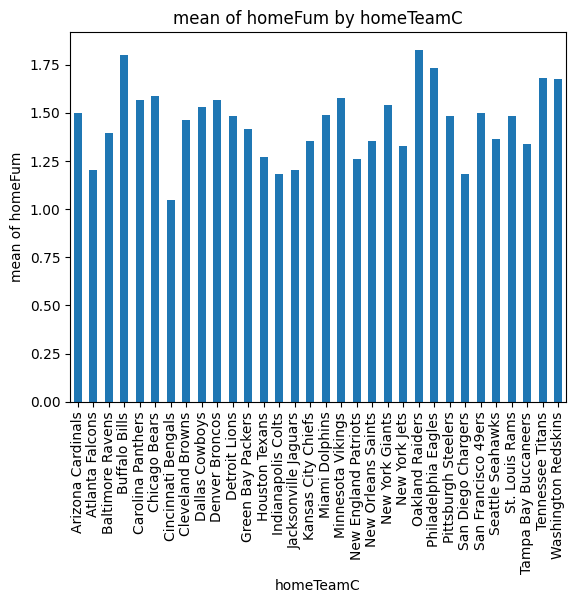

In [95]:
plot_func('homeFum', 'homeTeamC', 'mean')

From the above graph, we can see that the Oakland Raiders and Buffalo Bills have the highest average number of fumbles when they play at home.

##### **Example 2**

The code below runs the `plot_func` function with the following inputs:
- num_var = `awayRushYds`
- cat_var = `awayTeamC`
- stat_method = `max`

/tmp/ipython-input-1500467846.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_num_cat = reg_season.groupby(cat_var)[num_var].agg(stat_method) #creates data with arguments supplied


plot_func ran in 0.119832 seconds


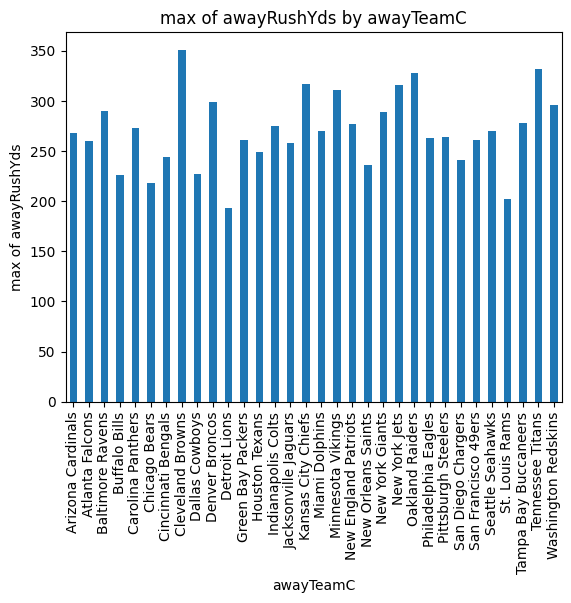

In [96]:
plot_func('awayRushYds', 'awayTeamC', 'max')

From the above graph, we can see that the Cleveland Browns have the highest maximum rushing yards when they are the away team.

##### **Example 3**

The code below runs the `plot_func` function with the following inputs:
- num_var = `HminusAscore`
- cat_var = `roofC`
- stat_method = `min`

plot_func ran in 0.032234 seconds


/tmp/ipython-input-1500467846.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stat_num_cat = reg_season.groupby(cat_var)[num_var].agg(stat_method) #creates data with arguments supplied


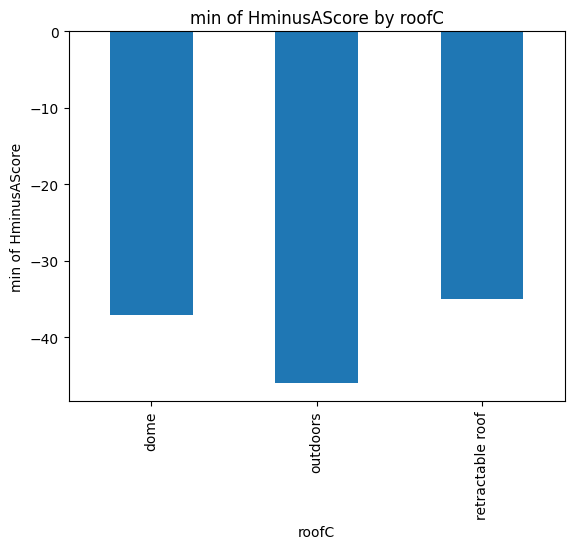

In [97]:
plot_func('HminusAScore', 'roofC', 'min')

From the above graph, we can see that the largest differential for the away team outscoring the home team is when the game is played outdoors.

*Note: Since the variable is* `HminusAscore` *, a negative value indiciates the away team outscored the home team. Thus, by using the* `min` *stat method, the graph reveals the "largest" differential in favor of the away team!*

##### **Additional Example: Line Plot**

The code below runs the `plot_func` function with the following inputs:
- num_var = `Aturnovers`
- cat_var = `weekN`
- stat_method = `median`

plot_func ran in 0.016574 seconds


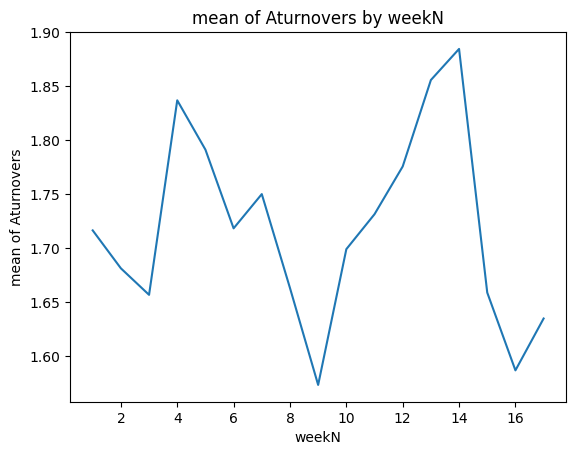

In [98]:
plot_func('Aturnovers', 'weekN', 'mean')

From the above graph, we see that the lowest average number of turnovers for away teams occurred in week 9, and the highest average number of turnovers for away teams occurred in week 14.